### Impoting the Libraries

In [229]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data set

In [230]:
df= pd.read_csv(r"C:\Users\udayk\Downloads\car_df_EDA.csv")

In [231]:
df.head()

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


### Data cleaning

In [232]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [233]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)

In [234]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

### Duplicated values

In [235]:
df.duplicated().sum()

3

In [236]:
df.drop_duplicates(inplace= True)

### structural errors

In [237]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [238]:
for i in df.columns:
    print(f"{i} = {df[i].unique()}")
    print()

make = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel_type = ['gas' 'diesel']

aspiration = ['std' 'turbo']

num_of_doors = ['two' 'four' '?']

body_style = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels = ['rwd' 'fwd' '4wd']

engine_location = ['front' 'rear']

wheel_base = [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2   nan 103.5 110.   88.4  93.7
 103.3  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9
 106.7 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3
  99.2 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7
 102.4 102.9 104.5  97.3 104.3 109.1]

length = [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  17

In [239]:
df["num_of_doors"]= df["num_of_doors"].replace("?",np.nan)

In [240]:
def doors(n):
    if n== "two":
        return 2
    elif n== "four":
        return 4
    

In [241]:
df["num_of_doors"]=df["num_of_doors"].apply(doors)

In [242]:
df["num_of_doors"].unique()

array([ 2.,  4., nan])

In [243]:
df["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [244]:
def cylinders(n):
    if n== "two":
        return 2
    elif n== "three":
        return 3
    elif n== "four":
        return 4
    elif n== "five":
        return 5
    elif n== "six":
        return 6
    elif n== "eight":
        return 8
    else:
        return 12
    

In [245]:
df["num_of_cylinders"]= df["num_of_cylinders"].apply(cylinders)

In [246]:
df["num_of_cylinders"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [247]:
df['horsepower'].replace("?",np.nan,inplace=True)

In [248]:
df['peak_rpm'].replace("?",np.nan,inplace=True)

In [249]:
df['price'].replace("?",np.nan,inplace=True)

### Missing Values

In [250]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [251]:
df["num_of_doors"].fillna(df["num_of_doors"].median(),inplace=True)

df["wheel_base"].fillna(df["wheel_base"].median(),inplace=True)

df["engine_type"].fillna(df["engine_type"].mode()[0],inplace=True)

df["engine_size"].fillna(df["engine_size"].median(),inplace=True)

df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

df["peak_rpm"].fillna(df["peak_rpm"].median(),inplace=True)

df["price"].fillna(df["price"].median(),inplace=True)

In [252]:
df.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [253]:
df.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,dohc,4,130.0,mpfi,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,...,dohc,4,130.0,mpfi,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,6,152.0,mpfi,9.0,154,5000,19,26,16500
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,...,ohc,4,109.0,mpfi,10.0,102,5500,24,30,13950
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,...,ohc,5,136.0,mpfi,8.0,115,5500,18,22,17450


In [254]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [277]:
df["price"]=  df["price"].astype("float64")
df["horsepower"]= df["horsepower"].astype("float64")
df["peak_rpm"]= df["peak_rpm"].astype("float64")

In [278]:
df.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### outliers

In [279]:
import warnings
warnings.filterwarnings("ignore")

In [280]:
num = df.select_dtypes(exclude="object")
num.columns

Index(['num_of_doors', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'num_of_cylinders', 'engine_size', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [281]:
for i in num.columns:
    #print(df[i])
    q1 = num[i].quantile(0.25)
    q3 = num[i].quantile(0.75)

    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    num[(num[i]<lower)] = lower
    num[(num[i]>upper)] = upper
    print(f"{i} Lower {lower} ")
    print(f"{i} Upper {upper}")
    print()

num_of_doors Lower -1.0 
num_of_doors Upper 7.0

wheel_base Lower 82.64999999999999 
wheel_base Upper 114.25000000000001

length Lower 145.3 
length Upper 201.3

width Lower 60.15 
width Upper 70.95000000000002

height Lower 46.449999999999996 
height Upper 61.25000000000001

curb_weight Lower 999.0 
curb_weight Upper 3919.0

num_of_cylinders Lower 4.0 
num_of_cylinders Upper 4.0

engine_size Lower 43.5 
engine_size Upper 167.5

compression_ratio Lower -12.0 
compression_ratio Upper 44.0

horsepower Lower -5.5 
horsepower Upper 158.5

peak_rpm Lower -7478.75 
peak_rpm Upper 12887.25

city_mpg Lower -5.25 
city_mpg Upper 72.75

highway_mpg Lower 9.75 
highway_mpg Upper 63.75

price Lower -15208.125 
price Upper 25516.875



<Axes: >

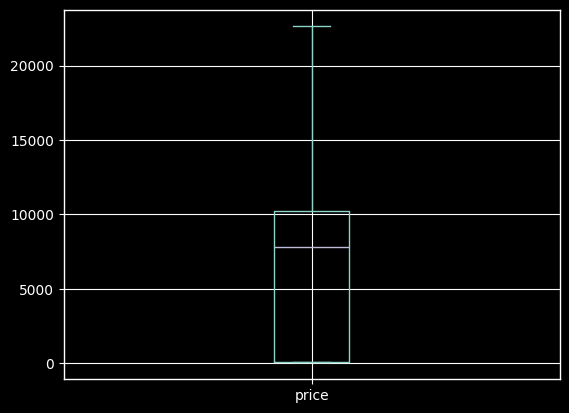

In [282]:
num['price'].plot(kind="box")

### Data Visualization

### Histogram

<Axes: title={'center': 'Histogram of price'}, xlabel='price', ylabel='Frequency'>

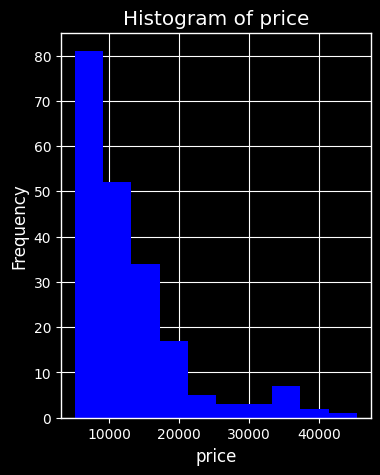

In [289]:
plt.style.use("ggplot")
plt.style.use("dark_background")
df['price'].plot(kind="hist",color= "blue",xlabel="price",title= "Histogram of price",grid=True,figsize=(4,5))

<Axes: title={'center': 'Histogram of Wheel Base'}, xlabel='wheel base', ylabel='Frequency'>

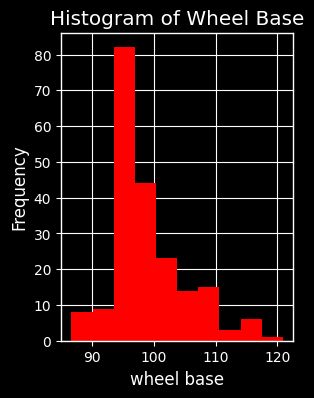

In [274]:
plt.style.use("dark_background")
df['wheel_base'].plot(kind="hist",
                      color= "red",
                      xlabel="wheel base",
                      title= "Histogram of Wheel Base",
                     figsize=(3,4))

<Axes: title={'center': 'Histogram of Number of cylinders'}, xlabel='Number of cylinders', ylabel='Frequency'>

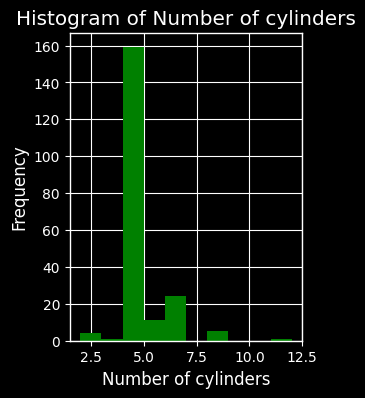

In [271]:
plt.style.use("dark_background")
df['num_of_cylinders'].plot(kind="hist",
                            color= "green",
                            xlabel="Number of cylinders",
                            title= "Histogram of Number of cylinders",
                           figsize=(3,4))

<Axes: title={'center': 'Histogram of horsepower'}, xlabel='horsepower', ylabel='Frequency'>

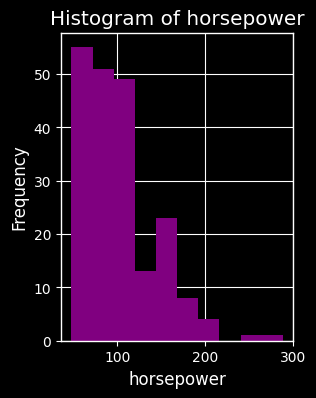

In [287]:
plt.style.use("dark_background")
df['horsepower'].plot(kind="hist",
                      color= "purple",
                      xlabel= "horsepower",
                      title= "Histogram of horsepower",
                      figsize=(3,4))